## Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/My Drive/PhysioNet/')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Pull data from PhysioNet

In [ ]:
#!gsutil -m cp -r gs://mitdb-1.0.0.physionet.org ./

In [ ]:
!pip install wfdb

import wfdb
from wfdb import processing

import glob
import torch
from torch.autograd.variable import Variable
import matplotlib.pyplot as plt
import numpy as np

cuda = True if torch.cuda.is_available() else False
Tensor = torch.cuda.FloatTensor if cuda else torch.FloatTensor

## Visualise Data

In [ ]:
# Demo 5 - Read a WFDB record and annotation. Plot all channels, and the annotation on top of channel 0.
record = wfdb.rdrecord('mit-bih/103')
annotation = wfdb.rdann('mit-bih/103', 'atr')

print(record.sig_name)
print(record.sig_len)
print(record.units)

sig_name = [str(s) for s in record.sig_name]
sig_units = [str(s) for s in record.units]
record_name = 'Record: %s' % record.record_name
ylabel = ['/'.join(pair) for pair in zip(sig_name, sig_units)]

print(annotation.chan)
print(ylabel)

['MLII', 'V2']
650000
['mV', 'mV']
[0 0 0 ... 0 0 0]
['MLII/mV', 'V2/mV']


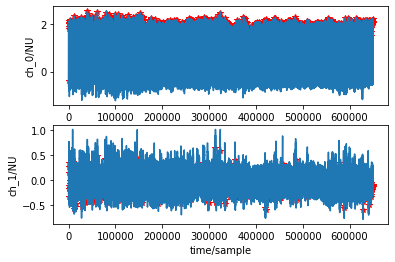

In [ ]:
end = (record.sig_len)
record = wfdb.rdrecord('mit-bih/113', sampto=end)
ann = wfdb.rdann('mit-bih/113', 'atr',sampto=end)

wfdb.plot_items(signal=record.p_signal,
                ann_samp=[ann.sample, ann.sample])

In [ ]:
print(ann.sample)
print(ann.record_name)
print(ann.symbol)

[    22    170    583 ... 649364 649675 649994]
113
['+', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'a', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N

In [ ]:
#Get unique values in list
mylist = list(set(ann.symbol))
print(mylist)

# N	Normal beat

# VFL	Ventricular flutter
# VT	Ventricular tachycardia
# V	Premature ventricular contraction

['N', 'a', '+']


In [ ]:
# Get indices of ECG where there is some
# ... premature ventricular contraction
indices = []
for i in range(len(ann.symbol)):
#Loop over indices of elements in `ann.symbol`
   if ann.symbol[i] == 'V' or ann.symbol[i] =='A':
      indices.append(ann.sample[i])

print(indices)

[135299, 215567, 532014]


### Process Arr Data

Resample from original Fs of 360Hz to 100Hz

In [ ]:
new_signal = processing.resample_multichan(record.p_signal, ann, fs=360, fs_target=100, resamp_ann_chan=0)

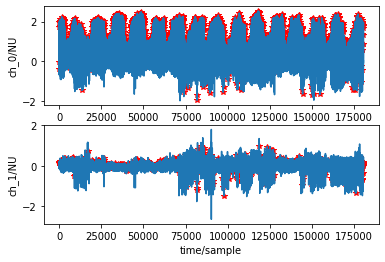

In [ ]:
wfdb.plot_items(signal=new_signal[0],
                ann_samp=[new_signal[1].sample, new_signal[1].sample])

Normalise Data between 0 and 1

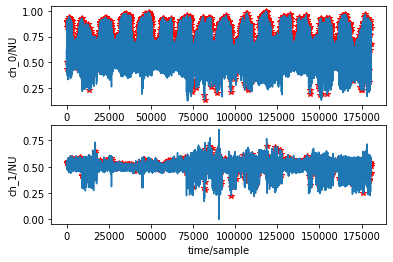

In [ ]:
ds_signal = processing.normalize_bound(new_signal[0], lb=0, ub=1)

wfdb.plot_items(signal=ds_signal,
                ann_samp=[new_signal[1].sample, new_signal[1].sample])

In [ ]:
print(ds_signal.shape)

(180555, 2)


In [ ]:
print(new_signal[1].symbol)
print(ann.symbol)

In [ ]:
# Get indices of ECG where there is some
# ... premature ventricular contraction
indices = []
for i in range(len(new_signal[1].symbol)):
#Loop over indices of elements in `ann.symbol`
   if new_signal[1].symbol[i] == 'V':
      indices.append(new_signal[1].sample[i])

print(indices)

[9130, 9179, 9348, 9394, 9683, 9852, 9899, 10081, 10264, 10312, 10581, 10630, 10816, 10866, 11135, 11182, 11451, 11499, 11667, 11840, 11888, 12072, 12246, 12414, 12463, 12652, 12821, 12867, 13043, 13224, 13272, 13448, 13491, 13664, 13715, 13895, 14057, 14104, 14278, 14455, 14503, 14677, 15021, 15070, 15247, 15295, 15485, 16023, 16076, 16259, 16436, 16481, 16654, 16843, 17021, 17692, 17740, 17787, 17991, 26640, 44626, 45265, 71140, 71551, 71705, 71865, 72111, 72268, 72685, 72986, 73033, 73284, 73440, 73756, 73996, 74043, 74200, 74429, 74480, 74633, 74775, 74922, 75062, 75200, 75331, 75468, 75616, 75763, 75900, 76046, 76198, 76347, 76489, 76632, 76772, 76916, 77053, 77189, 77337, 77484, 77619, 77750, 77889, 78028, 78163, 78296, 78434, 78579, 78722, 78853, 78987, 79128, 79268, 79402, 79536, 79675, 79821, 79967, 80108, 80254, 80410, 80554, 80691, 80831, 80974, 81115, 81251, 81389, 81538, 81696, 81839, 81981, 82129, 82273, 82417, 82562, 82719, 82884, 83044, 83205, 83383, 83551, 83718, 83891

## R-peak detection

In [ ]:
xqrs = processing.XQRS(sig=ds_signal[:,0], fs=100)
xqrs.detect()

Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.


In [ ]:
print(xqrs.qrs_inds)
print(len(xqrs.qrs_inds))

[    97    125    201 ... 180364 180497 180551]
2045


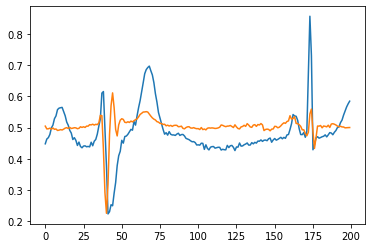

In [ ]:
plt.plot(ds_signal[180000-100:180000+100,0])
plt.plot(ds_signal[180000-100:180000+100,1])

## Format Data into 2 ECG leads

In [ ]:
ECG_1 = []
ECG_2 = []

count_ind = 0
for i in range(4, len(xqrs.qrs_inds[:-4]), 1):
  if (indices[count_ind]-250 <= xqrs.qrs_inds[i] <= indices[count_ind]+250) and (count_ind < len(indices)-1):
    ECG_1.append(ds_signal[xqrs.qrs_inds[i]-250 :xqrs.qrs_inds[i]+250, 0])
    ECG_2.append(ds_signal[xqrs.qrs_inds[i]-250 :xqrs.qrs_inds[i]+250, 1])
    count_ind += 1

In [ ]:
print(indices[300:350])
print(xqrs.qrs_inds[:])

print(len(indices))
print(len(xqrs.qrs_inds))
print(count_ind)

[122532, 122708, 122889, 123075, 123254, 123431, 123718, 123889, 124069, 124246, 124407, 124673, 124860, 125039, 125211, 125497, 125771, 125961, 126152, 126331, 126519, 126710, 126885, 127072, 127260, 127440, 127805, 143601, 143862, 144138, 144312, 144488, 144662, 144711, 144883, 145061, 145246, 145420, 145586, 145775, 145954, 146127, 146308, 146492, 146659, 146823, 147002, 147179, 147350, 147532]
[    97    125    201 ... 180364 180497 180551]
520
2045
519


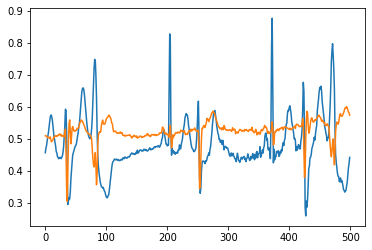

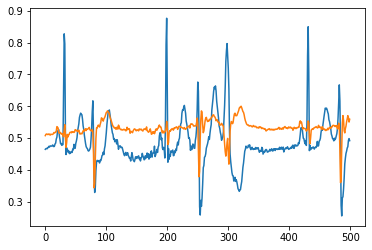

In [ ]:
for i in range(20,21):
  plt.figure()
  plt.plot(ECG_1[i])
  plt.plot(ECG_2[i])

  plt.figure()
  plt.plot(ECG_1[i+1])
  plt.plot(ECG_2[i+1])

## Save Data at `.pt`

In [ ]:
mv_data = torch.stack((Variable(Tensor(ECG_1)),Variable(Tensor(ECG_2))))
mv_data = mv_data.permute(1, 2, 0)
print('ECG_Shape:' +str(mv_data.shape))

torch.save(mv_data, '/content/drive/My Drive/MV_GAN_Journal/ecg_mit_arr.pt')

## Load Subject's data

In [ ]:
# Demo 5 - Read a WFDB record and annotation. Plot all channels, and the annotation on top of channel 0.
def load_subject(subject_id):
  record = wfdb.rdrecord('mit-bih/'+str(subject_id))
  annotation = wfdb.rdann('mit-bih/'+str(subject_id), 'atr')

  return record, annotation

## Process ECG

In [ ]:
def process_ecg(record, ann, arrlist):
  # Resample from original Fs of 360Hz to 100Hz
  new_signal = processing.resample_multichan(record.p_signal, ann, fs=360, fs_target=100, resamp_ann_chan=0)

  # Normalise Data between 0 and 1
  ds_signal = processing.normalize_bound(new_signal[0], lb=0, ub=1)

  # Get indices of ECG where there is some
  # ... premature ventricular contraction
  indices = []
  for i in range(len(new_signal[1].symbol)):
  #Loop over indices of elements in `ann.symbol`
    if new_signal[1].symbol[i] in arrlist: #== 'V' or new_signal[1].symbol[i] == 'Q' or new_signal[1].symbol[i] == 'A':
        indices.append(new_signal[1].sample[i])
        
  # If we don't have more than 5 Arrhythmias, cancel processing.
  #if (len(indices) <= 5):return 

  # R-peak Detection
  xqrs = processing.XQRS(sig=ds_signal[:,0], fs=100)
  xqrs.detect()

  # Format the data for the GAN into 2 leads.
  ECG_1 = []
  ECG_2 = []

  count_ind = 0
  for i in range(4, len(xqrs.qrs_inds[:-4]), 1):
    # Get at least one arrhythmia per sample
    if (indices[count_ind]-250 <= xqrs.qrs_inds[i] <= indices[count_ind]+250) and (count_ind < len(indices)-1):
      ECG_1.append(ds_signal[xqrs.qrs_inds[i]-250 :xqrs.qrs_inds[i]+250, 0])
      ECG_2.append(ds_signal[xqrs.qrs_inds[i]-250 :xqrs.qrs_inds[i]+250, 1])
      count_ind += 1
  
  return ECG_1, ECG_2

## Save data

In [ ]:
def save_ECG(ECG_Lead_1, ECG_Lead_2, subject_id):
  try:
    mv_data = torch.stack((Variable(Tensor(ECG_Lead_1)),Variable(Tensor(ECG_Lead_2))))
    mv_data = mv_data.permute(1, 2, 0)
    print('ECG_Shape:' +str(mv_data.shape))
    torch.save(mv_data, '/content/drive/My Drive/MV_GAN_Journal/Arr_Data/ecg_mit_arr_'+str(subject_id)+'.pt')

  except:
    print("No significant Arrhythmia found... skipping Subject "+str(subject_id)+".")
  

In [ ]:
def read_arr():

  array = ['L', 'R', 'A', 'a', 'J', 'S', 'V', 'F', '[', ']',
   '!', 'e', 'j', 'E', '/', 'f', 'Q', 'x', '|', '(AB',
   '(AFIB', '(AFL', '(B', '(BII', '(IVR', '(N', '(NOD',
   '(P', '(PREX', '(SBR', '(SVTA', '(T', '(VFL', '(VT']

  return array

## Main

In [ ]:
def main(filelist):
  for i in range(len(filelist)):
    base = os.path.basename(filelist[i])
    subject_id = os.path.splitext(base)[0]
    print("Subject_ID: "+str(subject_id))
    ecg_raw_data, ecg_ann_raw = load_subject(subject_id)
    arrhythmia_list = read_arr()
    ecg_lead_1, ecg_lead_2 = process_ecg(ecg_raw_data, ecg_ann_raw, arrhythmia_list)

    save_ECG(ecg_lead_1, ecg_lead_2, subject_id)

In [ ]:
filelist = glob.glob("./mit-bih/*.atr")
main(filelist)

In [ ]:
MV_Datalist = []
mv_filelist = glob.glob('/content/drive/My Drive/MV_GAN_Journal/Arr_Data/*.pt')
for i in range(len(mv_filelist)):
  data = torch.load(mv_filelist[i])
  MV_Datalist.append(data)

MV_data = (torch.vstack((MV_Datalist)))

torch.save(MV_data, '/content/drive/My Drive/MV_GAN_Journal/Arr_Data/ECG_Arr.pt')